## Coercion clustering techniques krok 1 

"Clustering techniques with Gene Expression Data for Acute Myeloid Leukemia"

https://medium.com/leukemiaairesearch/clustering-techniques-with-gene-expression-data-4b35a04f87d5#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjYwODNkZDU5ODE2NzNmNjYxZmRlOWRhZTY0NmI2ZjAzODBhMDE0NWMiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2ODUzNDc3NzYsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjExNjA1NzQ5MTc2MzIyNzc5NDU4NiIsImVtYWlsIjoid3RtNjk1NDUwMDg1QGdtYWlsLmNvbSIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJuYW1lIjoiV1RNIEhpc3Rvcml1cyIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS9BQWNIVHRmTkhBbzA2Y0RYV19KNjNjdE13Vm9uM3JrdElIQVc3eUhOOGJOOD1zOTYtYyIsImdpdmVuX25hbWUiOiJXVE0iLCJmYW1pbHlfbmFtZSI6Ikhpc3Rvcml1cyIsImlhdCI6MTY4NTM0ODA3NiwiZXhwIjoxNjg1MzUxNjc2LCJqdGkiOiI4YWViZWM1ODQxZDkxOGEyNTBhMWY4NDk5NTcxMmI2ZDQ3MWNjMjE5In0.eG3P0xo9psBtaOIZQJSfGRwACC1xrsEODt-ZOocx-bqciBcvFOBjmHuUNoz7TWjbVyf_3tuGXogDS99PlZhFdb59TTDRpg0mi0oO-5IQyuoSs_2OfumTv3KKXxL9cNNH4l5bOeQA-POQdyuxoN-2rN8IKICM46DkbyevxY9wq0UdyG_ux0L0uAXbJCQP2dDKbuJ4evKst0qtvbCCCzdDSKvUia1IDHshiddoxqeF6egTUjnVIr1sBPUxsz4phCFr3jK9fAc9yItW-DKu9XMjmtce6roLVVaUefGEcVwzRrmtFpidJft_lQbiimaib-Vb0u_fvGmzIgkcR2NcRAr5pw

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
#from google.colab import drive
#drive.mount("/content/gdrive", force_remount=True)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
#dataset
data = pd.read_table("/home/wmoszczy/2/201028_GSE122505_Leukemia_clean.txt", sep = "\t")

In [7]:
data.head(3)

,DDR1,MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193,UBA7,THRA,PTPN21,...,LOC100129924,FAM86B1,FAM86B2,FAM86DP,FAM86FP,SNHG17,LOC100505915,GSM,disease,FAB
0,7.135135,7.135135,6.482099,6.676021,6.645632,6.382956,9.792603,9.792603,6.519152,5.807912,...,5.566997,7.410738,7.410738,7.410738,7.410738,7.482258,5.944763,1,AML,M2
1,7.379455,7.379455,6.824016,6.575389,6.866953,5.777188,9.868853,9.868853,6.739256,5.394392,...,6.389914,7.684605,7.684605,7.684605,7.684605,7.800407,6.344267,2,AML,M4
2,7.776574,7.776574,6.777692,6.833048,6.740570,5.758784,9.503343,9.503343,6.585977,5.269234,...,6.359589,7.432409,7.432409,7.432409,7.432409,7.514223,6.742695,3,AML,M2


## data.disease ----> zmienna wynikowa

In [11]:
data.disease.tail(7)

2372    AML
2373    AML
2374    AML
2375    AML
2376    AML
2377    AML
2378    AML
Name: disease, dtype: object

In [8]:
data.disease.value_counts()

AML                                         969
ALL                                         906
Infection                                   113
CLL                                          85
healthy                                      82
Diabetes_Type_I                              74
AMKL                                         63
Diabetes_Type_II                             29
CML                                          22
clinically_isolated_syndrome                 18
MDS                                          10
DS_transient_myeloproliferative_disorder      8
Name: disease, dtype: int64

There are two category that are dominating the dataset: 

- Acute Myeloid Leukemia (AML) and 
- Acute Lymphoid Leukemia (ALL). 

For easier visualization we are grouping some categories.

## Filtering data for simplification

In [13]:
data.shape

(2321, 14211)

In [14]:
#removing some disease type

data["disease"] = np.where(data["disease"] == "Diabetes_Type_I" , "Diabetes", data["disease"])
data["disease"] = np.where(data["disease"] == "Diabetes_Type_II" , "Diabetes", data["disease"])
other = ['CML','clinically_isolated_syndrome', 'MDS', 'DS_transient_myeloproliferative_disorder']
data = data[~data.disease.isin(other)]
data.shape

(2321, 14211)

In [15]:
target = data["disease"]
df = data.drop("disease", 1)
df = df.drop("GSM", 1)
df = df.drop("FAB", 1)
df.shape
target.value_counts()

/tmp/ipykernel_20779/2522541626.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = data.drop("disease", 1)
/tmp/ipykernel_20779/2522541626.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("GSM", 1)
/tmp/ipykernel_20779/2522541626.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("FAB", 1)


AML          969
ALL          906
Infection    113
Diabetes     103
CLL           85
healthy       82
AMKL          63
Name: disease, dtype: int64

## Filter out the features with low variance and scaling the remaining features

In [16]:
df = df.drop(df.var()[(df.var() < 0.3)].index, axis=1)
from scipy.stats import zscore
df = df.apply(zscore)
df.shape

(2321, 4311)

In [17]:
df.tail(5)

,DDR1,MIR4640,HSPA6,MIR5193,UBA7,CCL5,CAPNS1,RPL35,PARK7,GDI2,...,UBQLN4,SH3BP4,C1orf186,LOC100505650,LOC101929219,PDCD4-AS1,SCAF4,LOC100996756,SNHG17,LOC100505915
2374,-0.617843,-0.617843,1.062437,-2.313230,-2.313230,0.683324,-1.975393,-1.458370,0.349908,-1.981195,...,-1.793447,0.519300,-0.947822,-0.947822,-0.947822,-1.020471,-1.294907,0.687404,0.090084,-1.307988
2375,-0.155023,-0.155023,-0.119911,-1.529768,-1.529768,1.281950,-2.147122,-2.644195,-0.305043,-2.022611,...,-1.620821,0.403164,-0.145235,-0.145235,-0.145235,1.141156,-0.713300,0.750613,-0.745625,-0.662005
2376,-1.108374,-1.108374,-0.627795,-1.824532,-1.824532,0.041295,-1.704160,-0.781311,0.198087,-1.162277,...,-1.948629,0.727465,-0.856136,-0.856136,-0.856136,-0.088342,0.181127,-0.508014,-0.200767,-0.966297
2377,-1.016884,-1.016884,-0.341561,-1.982178,-1.982178,0.465859,-2.372215,-3.702494,0.321495,-1.012596,...,-1.635576,0.497593,-0.721555,-0.721555,-0.721555,1.919037,1.267553,2.590434,-0.778344,-0.975274
2378,-0.577904,-0.577904,0.211177,-0.578910,-0.578910,0.867980,-1.252185,-0.798089,0.786883,-1.583874,...,-2.284910,1.877861,-0.338315,-0.338315,-0.338315,0.894690,-1.945169,0.454072,-0.819044,-1.074120


<AxesSubplot:>

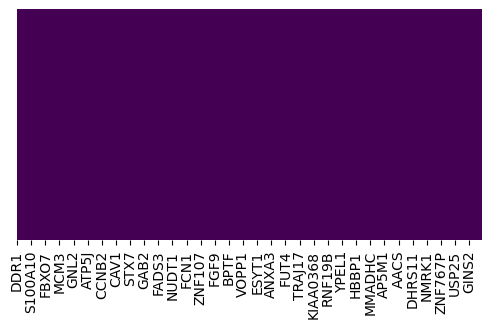

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## outcomes

In [27]:
target.head(5)

0    AML
1    AML
2    AML
3    AML
4    AML
Name: disease, dtype: object

# PCA

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X = pca.fit(df).transform(df)   # transformation

In [42]:
X[:2]  # <----the three most important gene packs

array([[ 22.58108198,  -3.53978932,  -7.10839202,  -8.63956662,
         19.76103431,  23.38688554,   2.94340668, -12.47469992,
          0.46775412,  -7.06851902,   6.15823203,  -8.87999723,
         -9.33267826,  -4.90551922,  11.04087325,  -2.38345968,
         -1.79846839,   0.14745484,  -1.42476276,  -3.19338726,
          7.60661406,  -8.42346396,   2.46236724,   0.81202862,
        -13.44687566,   1.0911496 ,   6.12060195,   4.01433791,
          5.64357036,   0.12335186,  -5.67359004,  -3.08749911,
          4.11615332,  -6.14118867,   1.08015924,  -3.42982663,
         -1.82711456,   4.22125378,  -0.60864366,   0.8016958 ,
          0.84690835,   1.49626604,  10.49767504,   0.54798839,
          5.28550476,  -3.18246466,  -5.8348939 ,  -0.54177215,
          8.08176843,   0.62679   ],
       [ 15.95794733,  -4.01307001,  -3.26669056, -18.83332548,
         17.24011281,  15.47783746,   0.70174607,  -5.81842883,
         -4.97047912,  -2.2632025 ,  -2.07466266,  -4.22776891,
   

In [23]:
from sklearn.preprocessing import LabelEncoder

#  encoding outcomes into number

le = LabelEncoder()
le.fit(target)
y_lan = le.transform(target)

In [29]:
## outcomes
y_lan

array([2, 2, 2, ..., 2, 2, 2])

In [30]:
pca_df = pd.DataFrame(columns = ["x", "y", "name", "label"])
pca_df["PCA1"] = X[:, 0]   #<--- first pack
pca_df["PCA2"] = X[:, 1]   #<--- secound pack
pca_df["Disease"] = target   #<--- outcomes
pca_df["label"] = y_lan      #<--- outcomes coded

In [35]:
pca_df.sample(5)

,x,y,name,label,PCA1,PCA2,Disease
388,NaN,NaN,NaN,2,-3.362287,-6.641334,Infection
1255,NaN,NaN,NaN,6,-6.007570,13.407273,healthy
350,NaN,NaN,NaN,5,-27.398754,24.422325,Infection
1020,NaN,NaN,NaN,0,26.873569,28.389777,AML
1683,NaN,NaN,NaN,0,32.930473,-19.847055,ALL


## SNS

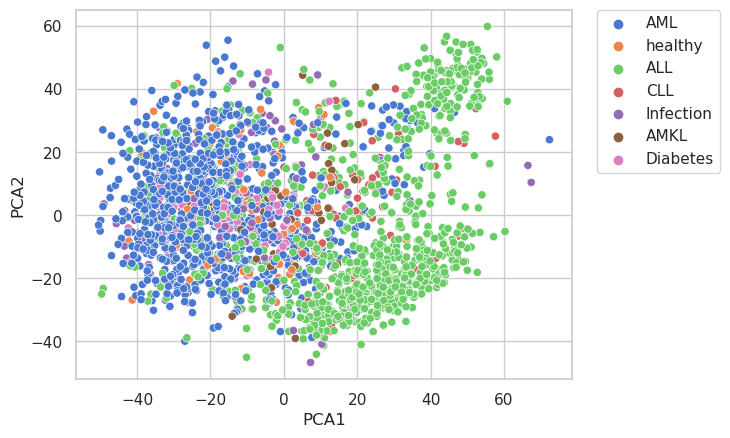

In [43]:
sns.set(style="whitegrid", palette="muted")
#sns.set_theme(style="whitegrid")

ax = sns.scatterplot(x="PCA1", y="PCA2", hue="Disease",  data=pca_df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig("GSE122505_Leukemia_PCA.pdf", dpi = 300)
#plt.savefig("GSE122505_Leukemia_PCA.png")
#pca_df.to_csv("GSE122505_Leukemia_PCA.csv")